# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.087761e+01     7.489991e+00
 * time: 0.003942012786865234
     1     2.316789e+01     3.494566e+00
 * time: 0.02032613754272461
     2     1.810485e+01     3.684539e+00
 * time: 0.03621315956115723
     3     1.301479e+01     2.371193e+00
 * time: 0.05179619789123535
     4     1.044185e+01     1.201951e+00
 * time: 0.06734299659729004
     5     9.718199e+00     1.937950e+00
 * time: 0.07994818687438965
     6     9.252760e+00     1.174154e+00
 * time: 0.09265303611755371
     7     8.903570e+00     9.186123e-01
 * time: 0.10547304153442383
     8     8.565936e+00     1.141078e+00
 * time: 0.11823511123657227
     9     8.349261e+00     7.987975e-01
 * time: 0.13118314743041992
    10     8.200375e+00     6.413241e-01
 * time: 0.1439511775970459
    11     8.047839e+00     5.417470e-01
 * time: 0.1567671298980713
    12     8.028514e+00     8.155602e-01
 * time: 0.1670231819152832
    13     7.989791e+00     6.691374e-01
 * time: 0

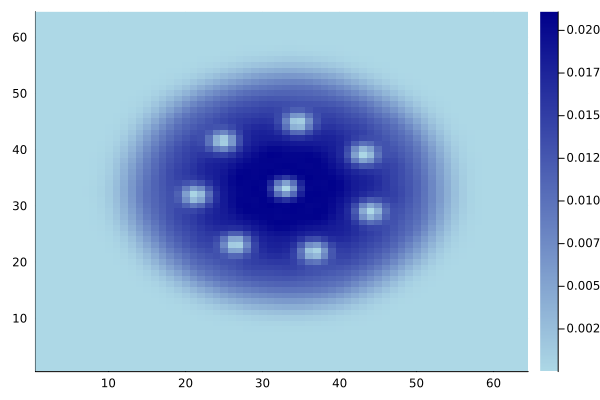

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)